In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [2]:
# Reading data
data = pd.read_csv('data.csv')
data

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9
91998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,digit_9


In [3]:
# Assigning values to X and Y, X representing the pixel intensities and Y representing the character
X = np.genfromtxt('data.csv', delimiter = ',', skip_header = 1, usecols = range(1024))
Y = data['character'].values

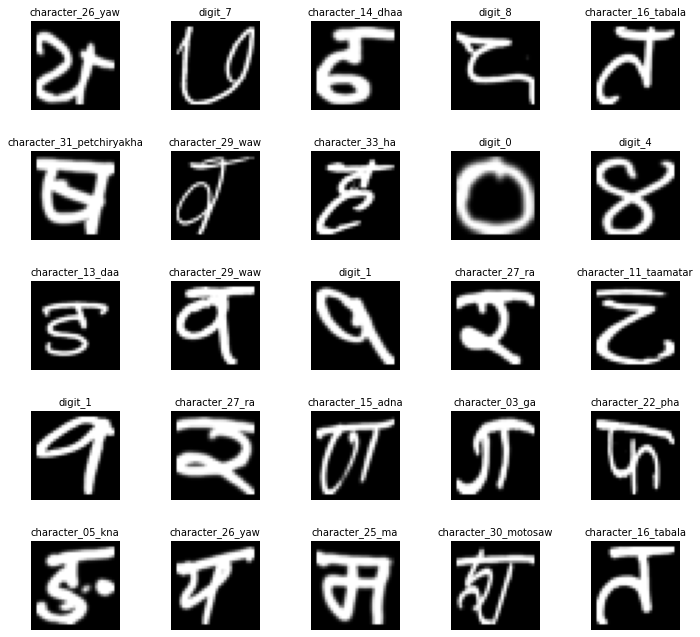

In [4]:
# Visualizing the data
fig, axes = plt.subplots(5, 5, figsize = (5, 5))
fig.tight_layout(pad = 2,rect = [0, 0.05, 2, 1.91]) #[left, bottom, right, top]

for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(91999)
    
    X_random_reshaped = X[random_index].reshape((32,32))
    
    ax.imshow(X_random_reshaped, cmap = 'gray')
    
    ax.set_title(Y[random_index], fontsize = 10)
    ax.set_axis_off()

In [5]:
# Normalizing X
X /= 255.0

# Encoding Y as an integer
Y_encoded = np.zeros(92000)
for index in range(92000):
    if Y[index][6] != 't':
        Y_encoded[index] = float(Y[index][6]) + 37
    else:
        Y_encoded[index] = float(Y[index][10])*10 + float(Y[index][11])

In [6]:
# Splitting data into training set and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_encoded, test_size = 0.60, random_state = 1)

In [10]:
# Compiles and fits the model as per the training set and returns accuracy on test set
def compile_fit(model, rate):
    tf.random.set_seed(1234)
    model.compile(
        loss = SparseCategoricalCrossentropy(from_logits = True),
        optimizer = Adam(learning_rate = rate)
    )
    
    model.fit(X_train, Y_train, epochs = 20)
    
    prediction = model.predict(X_test)
    accuracy = 0.
    
    for index in range(len(Y_test)):
        accuracy += (np.argmax(prediction[index]) == Y_test[index])
    accuracy /= len(Y_test)
    
    return accuracy

In [16]:
single_layer_relu_model_accuracy = np.zeros(5)

# Single Layer ReLU Model
single_layer_relu_model = Sequential(
    [   
        tf.keras.Input(shape = (1024,)),
        Dense(1000, activation = 'relu'),
        Dense(47, activation = 'linear')
    ]
)

for i in range(5):
    single_layer_relu_model_accuracy[i] = compile_fit(single_layer_relu_model, 0.0001 + i*0.0002)

Epoch 1/20
1150/1150 [==============================] - 4s 3ms/step - loss: 1.7285
Epoch 2/20
1150/1150 [==============================] - 4s 3ms/step - loss: 1.0380
Epoch 3/20
1150/1150 [==============================] - 4s 3ms/step - loss: 0.8552
Epoch 4/20
1150/1150 [==============================] - 4s 3ms/step - loss: 0.7193
Epoch 5/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.6114
Epoch 6/20
1150/1150 [==============================] - 5s 4ms/step - loss: 0.5213
Epoch 7/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.4461
Epoch 8/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.3843
Epoch 9/20
1150/1150 [==============================] - 5s 4ms/step - loss: 0.3321
Epoch 10/20
1150/1150 [==============================] - 5s 4ms/step - loss: 0.2882
Epoch 11/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.2514
Epoch 12/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.2189
E

1150/1150 [==============================] - 4s 4ms/step - loss: 0.0357
Epoch 20/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.0319


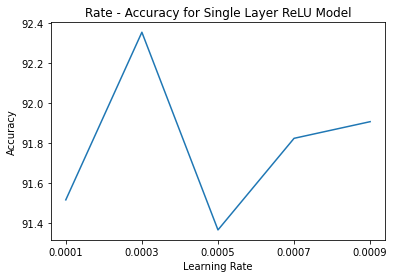

In [29]:
xplot = [0.0001, 0.0003, 0.0005, 0.0007, 0.0009]

# Accuracy vs Learning Rate plot for Single Layer ReLU Model
plt.plot(xplot, single_layer_relu_model_accuracy*100)
plt.xticks(xplot)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Rate - Accuracy for Single Layer ReLU Model')
plt.show()

In [18]:
single_layer_sigmoid_model_accuracy = np.zeros(5)

# Single Layer Sigmoid Model
single_layer_sigmoid_model = Sequential(
    [   
        tf.keras.Input(shape = (1024,)),
        Dense(1000, activation = 'sigmoid'),
        Dense(47, activation = 'linear')
    ]
)

for i in range(5):
    single_layer_sigmoid_model_accuracy[i] = compile_fit(single_layer_sigmoid_model, 0.0001 + i*0.0002)

Epoch 1/20
1150/1150 [==============================] - 4s 4ms/step - loss: 2.4850
Epoch 2/20
1150/1150 [==============================] - 4s 4ms/step - loss: 1.5331
Epoch 3/20
1150/1150 [==============================] - 4s 4ms/step - loss: 1.2742
Epoch 4/20
1150/1150 [==============================] - 4s 4ms/step - loss: 1.1446
Epoch 5/20
1150/1150 [==============================] - 4s 4ms/step - loss: 1.0611
Epoch 6/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.9985
Epoch 7/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.9449
Epoch 8/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.8980
Epoch 9/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.8551
Epoch 10/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.8142
Epoch 11/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.7754
Epoch 12/20
1150/1150 [==============================] - 4s 4ms/step - loss: 0.7390
E

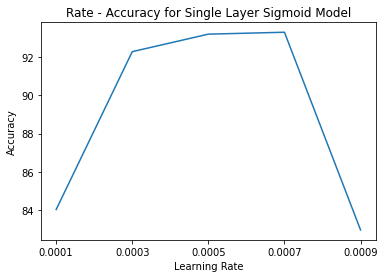

In [30]:
# Accuracy vs Learning Rate plot for Single Layer Sigmoid Model
plt.plot(xplot, single_layer_sigmoid_model_accuracy*100)
plt.xticks(xplot)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Rate - Accuracy for Single Layer Sigmoid Model')
plt.show()

In [20]:
double_layer_relu_model_accuracy = np.zeros(5)

# Double Layer ReLU Model
double_layer_relu_model = Sequential(
    [   
        tf.keras.Input(shape = (1024,)),
        Dense(1000, activation = 'relu'),
        Dense(500, activation = 'relu'),
        Dense(47, activation = 'linear')
    ]
)

for i in range(5):
    double_layer_relu_model_accuracy[i] = compile_fit(double_layer_relu_model, 0.0001 + i*0.0002)

Epoch 1/20
1150/1150 [==============================] - 6s 5ms/step - loss: 1.5516
Epoch 2/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.8464
Epoch 3/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.6102
Epoch 4/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.4540
Epoch 5/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.3478
Epoch 6/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.2680
Epoch 7/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.2099
Epoch 8/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.1628
Epoch 9/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.1271
Epoch 10/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.0978
Epoch 11/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.0747
Epoch 12/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.0573
E

1150/1150 [==============================] - 6s 5ms/step - loss: 0.0607
Epoch 20/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.0802


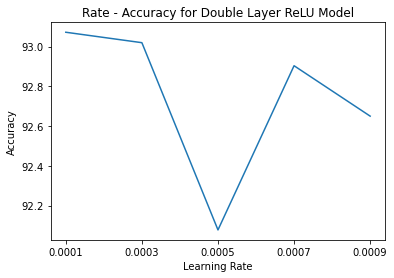

In [21]:
# Accuracy vs Learning Rate plot for Double Layer ReLU Model
plt.plot(xplot, double_layer_relu_model_accuracy*100)
plt.xticks(xplot)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Rate - Accuracy for Double Layer ReLU Model')
plt.show()

In [22]:
double_layer_sigmoid_model_accuracy = np.zeros(5)

# Double Layer Sigmoid Model
double_layer_sigmoid_model = Sequential(
    [   
        tf.keras.Input(shape = (1024,)),
        Dense(1000, activation = 'sigmoid'),
        Dense(500, activation = 'sigmoid'),
        Dense(47, activation = 'linear')
    ]
)

for i in range(5):
    double_layer_sigmoid_model_accuracy[i] = compile_fit(double_layer_sigmoid_model, 0.0001 + i*0.0002)

Epoch 1/20
1150/1150 [==============================] - 6s 5ms/step - loss: 2.9091
Epoch 2/20
1150/1150 [==============================] - 6s 5ms/step - loss: 1.7368
Epoch 3/20
1150/1150 [==============================] - 6s 5ms/step - loss: 1.3668
Epoch 4/20
1150/1150 [==============================] - 6s 5ms/step - loss: 1.1900
Epoch 5/20
1150/1150 [==============================] - 6s 5ms/step - loss: 1.0745
Epoch 6/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.9853
Epoch 7/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.9081
Epoch 8/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.8394
Epoch 9/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.7763
Epoch 10/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.7172
Epoch 11/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.6617
Epoch 12/20
1150/1150 [==============================] - 6s 5ms/step - loss: 0.6108
E

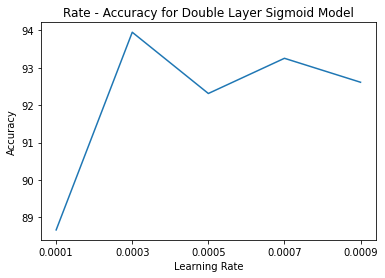

In [23]:
# Accuracy vs Learning Rate plot for Double Layer Sigmoid Model
plt.plot(xplot, double_layer_sigmoid_model_accuracy*100)
plt.xticks(xplot)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Rate - Accuracy for Double Layer Sigmoid Model')
plt.show()

In [24]:
triple_layer_relu_model_accuracy = np.zeros(5)

# Triple Layer ReLU Model
triple_layer_relu_model = Sequential(
    [   
        tf.keras.Input(shape=(1024,)),
        Dense(1100, activation = 'relu'),
        Dense(700, activation = 'relu'),
        Dense(200, activation = 'relu'),
        Dense(47, activation = 'linear')
    ]
)

for i in range(5):
    triple_layer_relu_model_accuracy[i] = compile_fit(triple_layer_relu_model, 0.0001 + i*0.0002)

Epoch 1/20
1150/1150 [==============================] - 9s 8ms/step - loss: 1.5099
Epoch 2/20
1150/1150 [==============================] - 9s 8ms/step - loss: 0.7474
Epoch 3/20
1150/1150 [==============================] - 9s 8ms/step - loss: 0.4989
Epoch 4/20
1150/1150 [==============================] - 9s 8ms/step - loss: 0.3539
Epoch 5/20
1150/1150 [==============================] - 9s 8ms/step - loss: 0.2617
Epoch 6/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.1919
Epoch 7/20
1150/1150 [==============================] - 9s 8ms/step - loss: 0.1420
Epoch 8/20
1150/1150 [==============================] - 9s 8ms/step - loss: 0.1026
Epoch 9/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.0778
Epoch 10/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.0542
Epoch 11/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.0449
Epoch 12/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.0320
E

1150/1150 [==============================] - 8s 7ms/step - loss: 0.0894
Epoch 20/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.0665


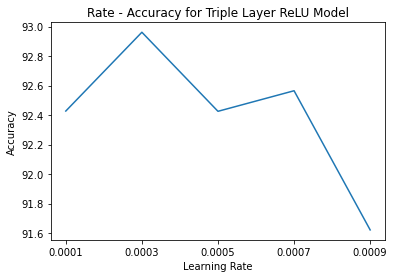

In [25]:
# Accuracy vs Learning Rate plot for Triple Layer ReLU Model
plt.plot(xplot, triple_layer_relu_model_accuracy*100)
plt.xticks(xplot)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Rate - Accuracy for Triple Layer ReLU Model')
plt.show()

In [26]:
triple_layer_sigmoid_model_accuracy = np.zeros(5)

# Triple Layer Sigmoid Model
triple_layer_sigmoid_model = Sequential(
    [   
        tf.keras.Input(shape=(1024,)),
        Dense(1100, activation = 'sigmoid'),
        Dense(700, activation = 'sigmoid'),
        Dense(200, activation = 'sigmoid'),
        Dense(47, activation = 'linear')
    ]
)

for i in range(5):
    triple_layer_sigmoid_model_accuracy[i] = compile_fit(triple_layer_sigmoid_model, 0.0001 + i*0.0002)

Epoch 1/20
1150/1150 [==============================] - 8s 7ms/step - loss: 3.2730
Epoch 2/20
1150/1150 [==============================] - 8s 7ms/step - loss: 2.1580
Epoch 3/20
1150/1150 [==============================] - 8s 7ms/step - loss: 1.6640
Epoch 4/20
1150/1150 [==============================] - 8s 7ms/step - loss: 1.3972
Epoch 5/20
1150/1150 [==============================] - 8s 7ms/step - loss: 1.2211
Epoch 6/20
1150/1150 [==============================] - 8s 7ms/step - loss: 1.0870
Epoch 7/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.9737
Epoch 8/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.8742
Epoch 9/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.7849
Epoch 10/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.7042
Epoch 11/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.6330
Epoch 12/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.5701
E

1150/1150 [==============================] - 8s 7ms/step - loss: 0.0264
Epoch 20/20
1150/1150 [==============================] - 8s 7ms/step - loss: 0.0141


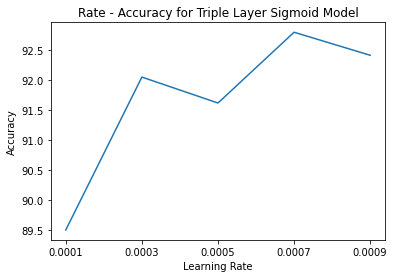

In [27]:
# Accuracy vs Learning Rate plot for Triple Layer Sigmoid Model
plt.plot(xplot, triple_layer_sigmoid_model_accuracy*100)
plt.xticks(xplot)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.title('Rate - Accuracy for Triple Layer Sigmoid Model')
plt.show()